In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

!pip install geopandas
import geopandas as gpd
import plotly.express as px

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.8/15.9 MB 9.1 MB/s eta 0:00:02
   -------- ------------------------------- 3.4/15.9 MB 8.4 MB/s eta 0:00:02
   ----------- ---------------------------- 4.5/15.9 MB 7.4 MB/s eta 0:00:02
   --------------- ------------------------ 6.0/15.9 MB 7.4 MB/s eta 0:00:02
   ------------------- -------------------- 7.9/15.9 MB 7.6 MB/s eta 0:00:02
   ------------------------ --------------- 9.7/15.9 MB 7.8 MB/s eta 0:00:01
   ---------------------------- ----------- 11.5/15.9 MB 8.1 MB/s eta 0:00:01
   -------------------------------- ------- 13.1/15.9 MB 8.1 MB/s eta 0:00:01
   ------------------------------------- -- 14.9/15.9 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 15.9/15.9 MB 8.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
   - ----

In [36]:
df = pd.read_csv('Amazon Sale Report.csv') 
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [38]:
df['Date'] = pd.to_datetime(df['Date'])

sales_trend = df.groupby(df['Date'].dt.to_period('M')).agg({'Amount': 'sum'}).reset_index()


In [39]:
df = df.drop(columns=['New', 'PendingS'])
df = df.dropna(subset=['Amount'])

In [40]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


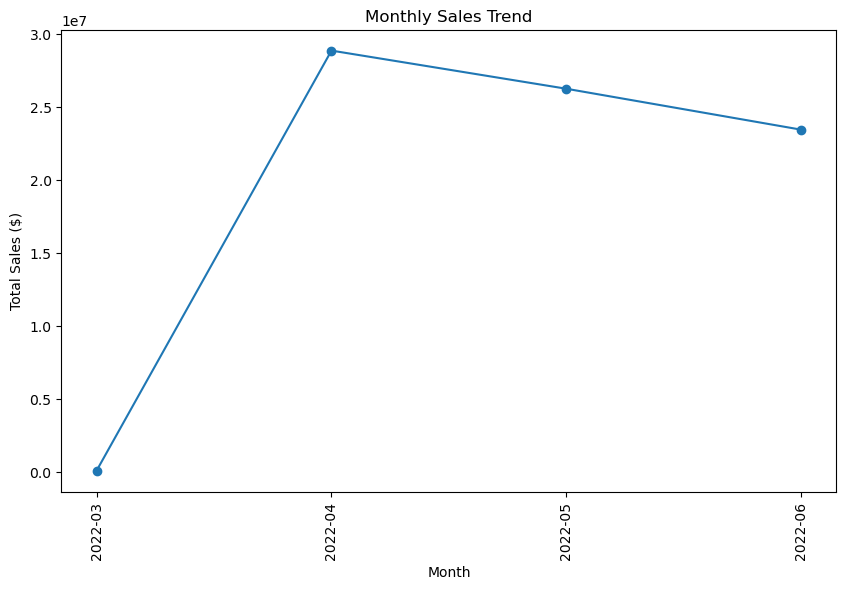

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(sales_trend['Date'].astype(str), sales_trend['Amount'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90)
plt.show()

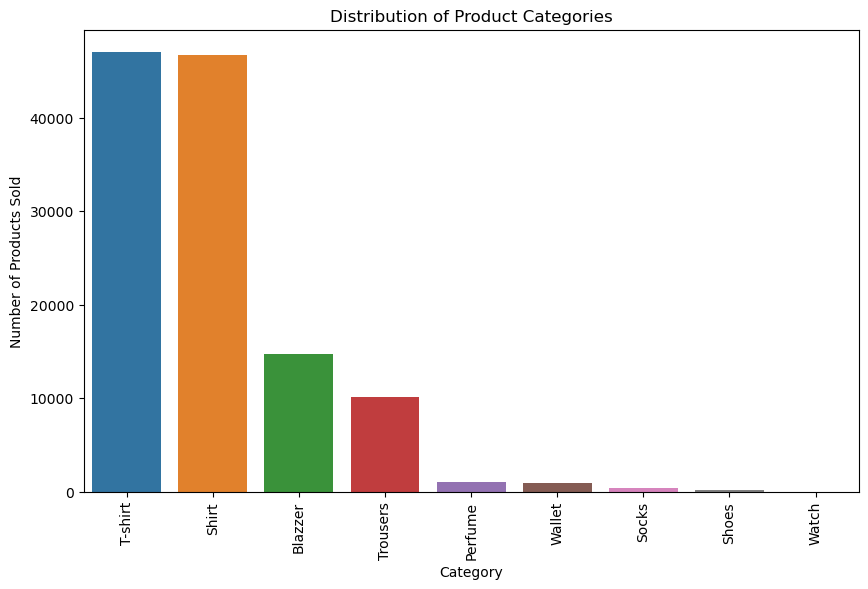

In [53]:

category_distribution = df['Category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.title('Distribution of Product Categories')
plt.xticks(rotation=90)
plt.ylabel('Number of Products Sold')
plt.show()



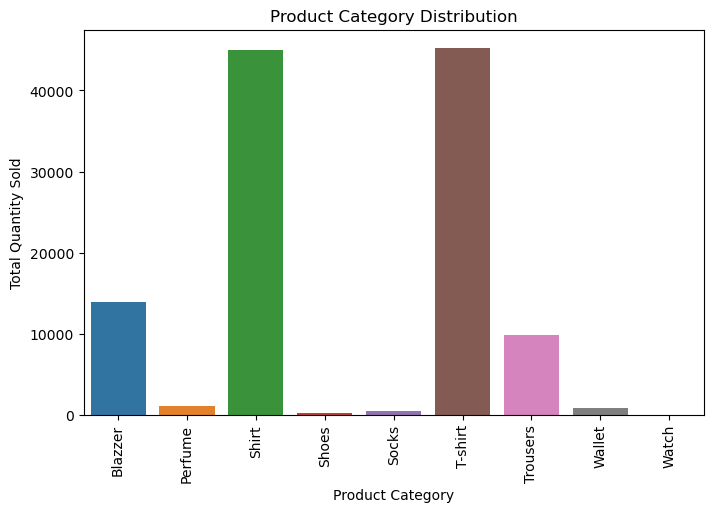

In [45]:
product_category_distribution = df.groupby('Category').agg({'Qty': 'sum'}).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=product_category_distribution, x='Category', y='Qty')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.show()


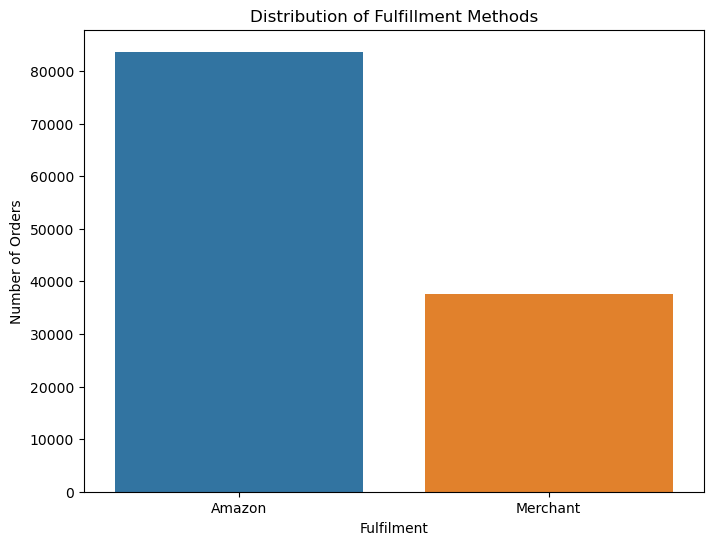

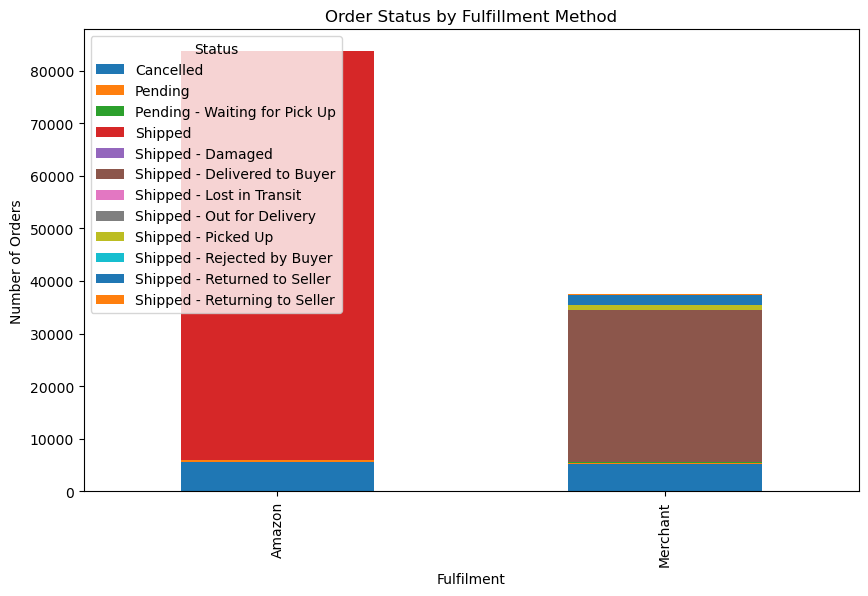

In [54]:

fulfillment_distribution = df['Fulfilment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=fulfillment_distribution.index, y=fulfillment_distribution.values)
plt.title('Distribution of Fulfillment Methods')
plt.ylabel('Number of Orders')
plt.show()

fulfillment_status = df.groupby(['Fulfilment', 'Status']).size().unstack(fill_value=0)

fulfillment_status.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Order Status by Fulfillment Method')
plt.ylabel('Number of Orders')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


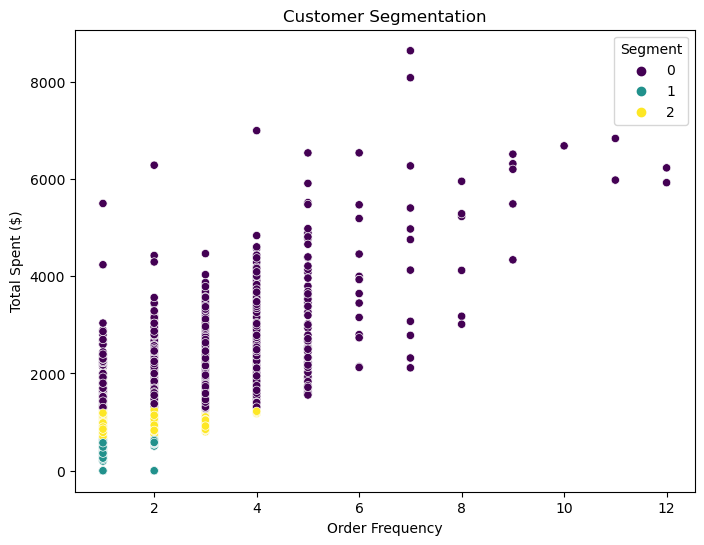

In [57]:

customer_data = df.groupby('Order ID').agg({
    'Order ID': 'count',
    'Amount': 'sum'
}).rename(columns={'Order ID': 'Order Frequency', 'Amount': 'Total Spent'}).reset_index()


kmeans = KMeans(n_clusters=3)
customer_data['Segment'] = kmeans.fit_predict(customer_data[['Order Frequency', 'Total Spent']])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_data, x='Order Frequency', y='Total Spent', hue='Segment', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Order Frequency')
plt.ylabel('Total Spent ($)')
plt.show()


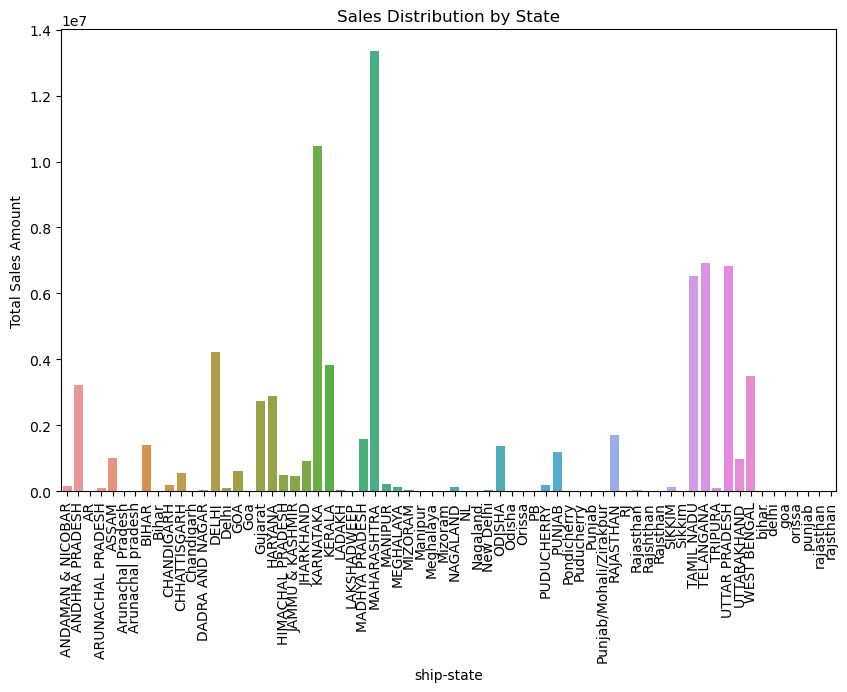

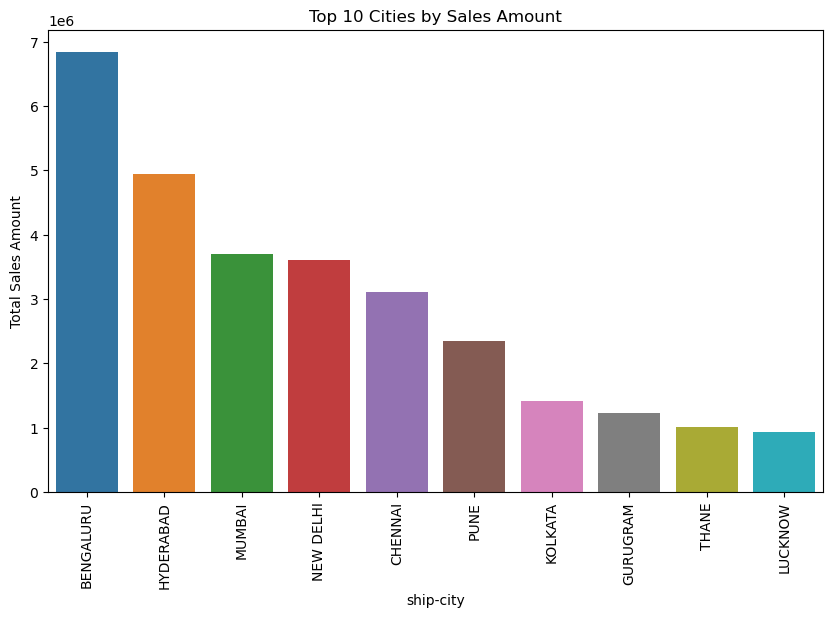

In [55]:

state_sales = df.groupby('ship-state').agg({'Amount': 'sum', 'Order ID': 'count'}).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='ship-state', y='Amount', data=state_sales)
plt.title('Sales Distribution by State')
plt.xticks(rotation=90)
plt.ylabel('Total Sales Amount')
plt.show()


city_sales = df.groupby('ship-city').agg({'Amount': 'sum', 'Order ID': 'count'}).reset_index().sort_values(by='Amount', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='ship-city', y='Amount', data=city_sales)
plt.title('Top 10 Cities by Sales Amount')
plt.xticks(rotation=90)
plt.ylabel('Total Sales Amount')
plt.show()


# Insights
1.Sales Trends & Overview:

Analyze sales over time to detect peak seasons or periods of higher sales. This could reveal important trends such as increased demand during specific months or events (e.g., festive seasons).
Identify consistent underperforming periods to explore reasons such as low inventory, marketing gaps, or external market conditions.

2.Product Category Preferences:

Analyze the distribution of product categories and sizes to identify the most popular items. For instance, if certain sizes or product categories (like T-shirts or Shirts) are more frequently purchased, this suggests product preference trends.
Identify products with high return or cancellation rates to explore potential quality issues or mismatch between customer expectations and product descriptions.

3.Fulfillment Efficiency:

Compare the effectiveness of different fulfillment methods (e.g., Merchant vs. Amazon) by analyzing order delivery times and cancellation rates.
Investigate whether certain fulfillment methods are associated with higher customer satisfaction or lower shipping times, indicating better logistics performance.

4.Geographical Sales Distribution:

Explore the geographical sales distribution across cities and states. Identify regions with the highest sales and investigate factors contributing to this success, such as local promotions, population density, or logistics networks.
Highlight underperforming regions that could benefit from better marketing, logistical improvements, or targeted campaigns.